**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 1

**Datos de la entrega:** Lunes 25 de setiembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Máximo Agrazal Quirós
- Celina Madrigal Murillo






# Parte 1.  Series temporales y graficación  (65 puntos)

1. Se adjuntan un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos en el PDF, se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo la serie temporal en el archivo: TS_d_1, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.
1. Considere que el código ejemplo en el PDF podría requerir algún pequeño cambio por un tema de versiones de la biblioteca en el tiempo.


In [49]:
#Importación de bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [50]:
series = pd.read_csv('TS_d_1.csv', header = 0, parse_dates=['fecha'], index_col=0) #Carga el archivo e indica que la columna 0 deberia ser tratada como fechas
print(series.head()) #Imprime las primeras 5 filas
print(type(series)) #Imprime el tipo de dato de la variable series

          temperatura
fecha                
1/1/2004          5.3
2/1/2004          5.6
3/1/2004          5.9
4/1/2004          6.2
5/1/2004          8.4
<class 'pandas.core.frame.DataFrame'>


### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [51]:
#Imprime un resumen de las estadisticas de la variable series incluyendo el promedio, la mediana y la desviación estándar
#mean = promedio
#std = desviación estándar
#50% = mediana 
print(series.describe())

       temperatura
count  4749.000000
mean      8.013887
std       3.863948
min       1.570000
25%       5.020000
50%       7.400000
75%       9.460000
max      24.200000


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [52]:
from pandas import DataFrame

series = series.reset_index() #Resetea el índice por si no está en formato de fecha
series['fecha'] = pd.to_datetime(series['fecha'], format = '%d/%m/%Y') #Convierte los valores en la columna 'fecha' a objetos de fecha y hora
promedio_por_mes = series.groupby(series['fecha'].dt.month)['temperatura'].mean() #Calcula el promedio por mes
print(promedio_por_mes) #Imprime los promedios


fecha
1     7.688139
2     7.735815
3     7.874268
4     8.524821
5     8.221762
6     7.273333
7     7.706328
8     8.226898
9     8.821692
10    8.498586
11    7.806769
12    7.776055
Name: temperatura, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [53]:
from pandas import concat

temps = DataFrame(series['temperatura'].values) #Crea un DataFrame a partir de los valores de la columna 'temperatura' de 'series'
dataframe = concat([temps.shift(5), temps.shift(4),temps.shift(3), temps.shift(2),temps.shift(1), temps], axis=1) #Concatena las columnas
dataframe.columns = ['t-4', 't-3', 't-2', 't-1','t','t+1'] #Renombra las columnas para representar los diferentes pasos del tiempo
print(dataframe.head(5)) #Imprime las primeras 5 filas del DataFrame

   t-4  t-3  t-2  t-1    t  t+1
0  NaN  NaN  NaN  NaN  NaN  5.3
1  NaN  NaN  NaN  NaN  5.3  5.6
2  NaN  NaN  NaN  5.3  5.6  5.9
3  NaN  NaN  5.3  5.6  5.9  6.2
4  NaN  5.3  5.6  5.9  6.2  8.4


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [54]:
shifted = temps.shift(1) #Toma temps y los desplaza en una posición hacia abajo
window = shifted.rolling(window=3) #Crea una ventana deslizante de tamaño 3
means = window.mean() #Calcula la media
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1) #Concatena la información
dataframe.columns = ['mínimo', 'media', 'máximo', 't+1'] #Renombra las columnas
print(dataframe.head(5)) #Imprime las primeras 5 filas del DataFrame

   mínimo  media  máximo  t+1
0     NaN    NaN     NaN  5.3
1     NaN    NaN     NaN  5.6
2     NaN    NaN     NaN  5.9
3     5.3    5.6     5.9  6.2
4     5.6    5.9     6.2  8.4


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

<Axes: xlabel='fecha'>

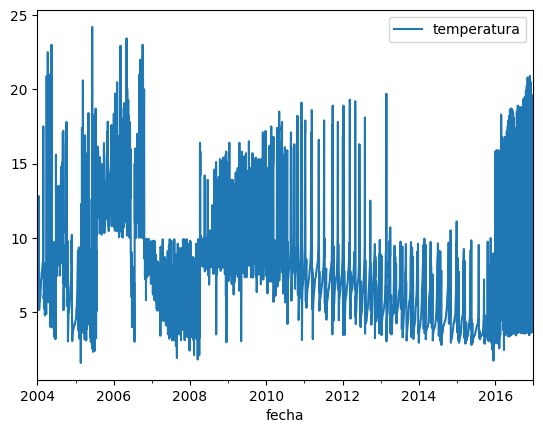

In [55]:
#Lee el archivo CSV.
#'header=0' indica que la primera fila del archivo CSV contiene los nombres de las columnas.
#'parse_dates=[0]' indica que la primera columna debe ser interpretada como fechas.
#'dayfirst=True' especifica que el formato de las fechas es día-mes-año.
#'index_col=0' indica que la primera columna debe ser utilizada como índice del DataFrame.
series = pd.read_csv('TS_d_1.csv', header = 0, parse_dates=[0], dayfirst=True, index_col=0)
series.plot() #Realiza un gráfico de la serie de tiempo

Viendo el gráfico podemos decir que la temperatura media ha ido aumentando y dismunuyendo a lo largo del tiempo. Se puede ver que entre el 2004 y 2006 estuvo subiendo y bajando continuamente, entre 2007 y 2008 se mantuvo abajo, en 2009 volvió a subir un poco y se mantuvo así hasta el 2013 donde bajó y volvió a subir en 2016.

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

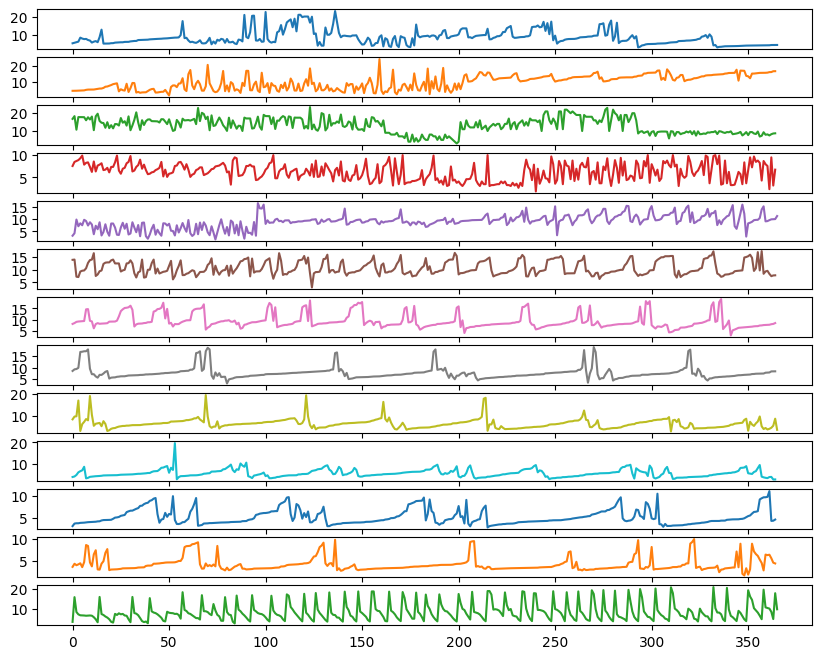

In [56]:
from matplotlib import pyplot 

years = series['temperatura'].groupby(pd.Grouper(freq='A')).apply(list).apply(pd.Series).T #Agrupa la columna 'temperatura' por año
years.plot(subplots=True, legend=False, figsize=(10, 8)) #Realiza un gráfico de las series temporales por año
pyplot.show() #Muestra el gráfico

Se puede notar que con este gráfico es más fácil ver individualmente lo que sucede año con año, en el anterior no se puede observar con tanta exactitud. 
Al igual que en el gráfico anterior se puede ver que la temperatura tiende a subir y bajar continuamente. Podemos ver que en 2007 la temperatura tuvo picos de subida y bajada muy continuos durante todo el año, al igual que en 2016. También se puede notar que del 2010 al 2015 se tiene un comportamiento muy similar donde la temperatura subio, se mantuvo un tiempo largo abajo y volvio a subir por un tiempo corto.

### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


array([[<Axes: title={'center': 'temperatura'}>]], dtype=object)

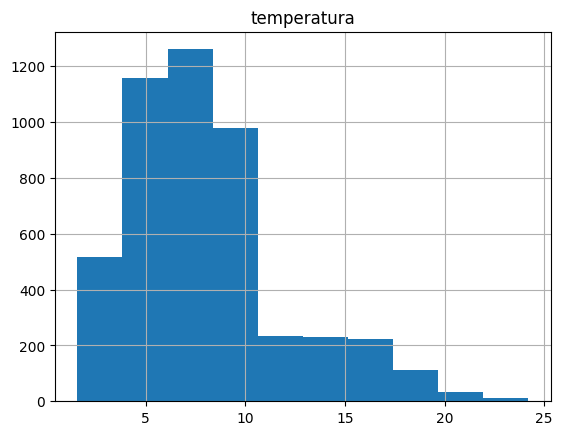

In [57]:
series.hist() #Genera un histograma

Con este histograma podemos ver la frecuencia de ocurrencia de cada temperatura. El eje horizontal representa la temperatura y el eje vertical representa la frecuencia, es decir, el número de veces que se registró cada temperatura. 
Al ver el histograma nos podemos dar cuenta que la temperatura que mas se repite se encuentra entre 5 y 10 grados.

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Axes: ylabel='Density'>

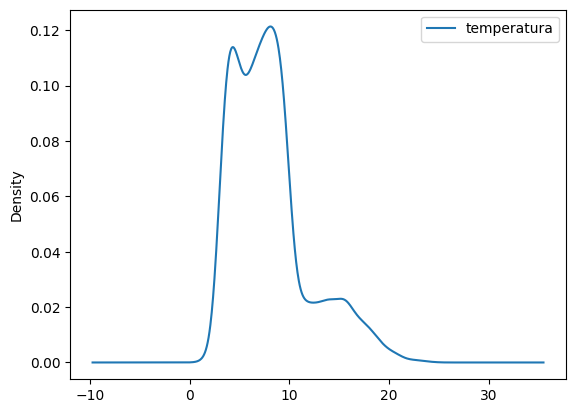

In [58]:
series.plot(kind='kde')

Al igual que en el histograma podemos ver que la mayor densidad se da maso menos en un rango entre 5 y 10 grados, lo cual indica que ahí se dio la mayor representación.

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

<Axes: >

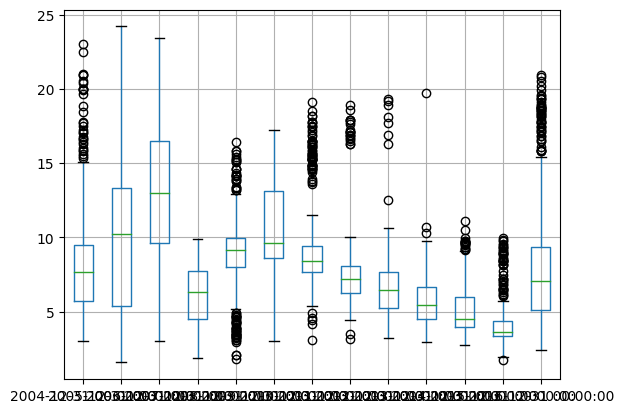

In [70]:
years.boxplot()

1. La caja muestra el rango intercuartil y la mediana. Los bigotes indican la dispersión de los datos y los puntos individuales representan valores atípicos.
2. Podemos ver facilmente varias cosas por año como el valor mínimo y el valor máximo de la temperatura, por ejemplo en el 2004 el valor mínimo fue 3 y el máximo fue 15, también que la mediana de todos los años va maso menos desde 4 hasta 13, y que solamente en 2005, 2006, 2007 y 2009 no se presentaron valores atípicos.

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


# Parte 2.  Diferenciación  (15 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_2.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.4

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

### 2.5

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué cree que sé mira así?

# Parte 3.  ARIMA  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Cap_24. Estudie su contenido. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_3.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 3.1

- Explique en qué consiste ARIMA.

### 3.2

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

### 3.3

- Analice si requiere hacer diferenciación o no. Explique

### 3.4

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

### 3.5

- Grafique el predicho versus el real y comente sus conclusiones.